In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Auto reload of library
%reload_ext autoreload
%autoreload 2

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

from import_KK import *
DeviceStrategy_CPU()
from data_KK import *
from description_KK import *
from preprocessing_KK import *
from preprocessing_text_KK import * ##
from algorithm_textmining_KK import * ##
from evaluation_KK import *
from visualization_KK import *

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Operation Platform:  64bit
OS Type:  Windows
OS Version:  11
Python Version:  3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[Kss]: From C:\Users\KK\anaconda3\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



Cuda is Ready?  False

Tensorflow Version:  2.18.0
Keras Version:  3.7.0
Torch Version:  2.5.1+cpu


2025-02-11 15:25:51,738	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Hyperparameters

In [15]:
# Preprocessing
SEARCH_KEYWORD = ['elder neglect', 'neglect', 'abuse', 'elder abuse', 'older adults', 'abuse neglect']
DATA_NAME = 'title_neglect.xlsx'
# TARGET = 'Title+Abstract'
TARGET = 'title'
CATEGORY = None
STOPWORDS = []
NGRAM_RANGE = (1,2)
TFIDF_MAXCOL = 5000
TFIDF_DELLOWFREQ = False
RAY = True
KEYBERT_TOPNKWD = 5
NUM_SHOWKEYWORD = 100
# Modeling
# TOKENIZER = 'TF-IDF'
TOKENIZER = 'KeyBERT'
NUM_TOPICS = 'auto'
NUM_TOPICWORDS = 10
NUM_TOPICSAMPLES = 5
# Save
SAVE_LOCAL = True
SAVE_NAME_PREP = 'wordfreq'
SAVE_NAME_LDA = 'Topics_Token('+str(NGRAM_RANGE[0])+'-'+str(NGRAM_RANGE[1])+')_byLDA.xlsx'

# Preprocessing

In [16]:
# Data Loading
df = pd.read_excel(os.path.join(os.getcwd(), 'Data', DATA_NAME))
# df.Category = df.Category.apply(lambda x: str(x).lower())
# df['Title+Abstract'] = df.Title + " " + df.Abstract
df[TARGET+'_Prep'] = df[TARGET].progress_apply(lambda x: text_preprocessor(x, del_number=False, 
                                                                           del_bracket_content=False,
                                                                           stop_words=STOPWORDS))


00%|██████████████████████████████████████████████████████████████████████████████| 538/538 [00:00<00:00, 1057.28it/s]

# Result Summary

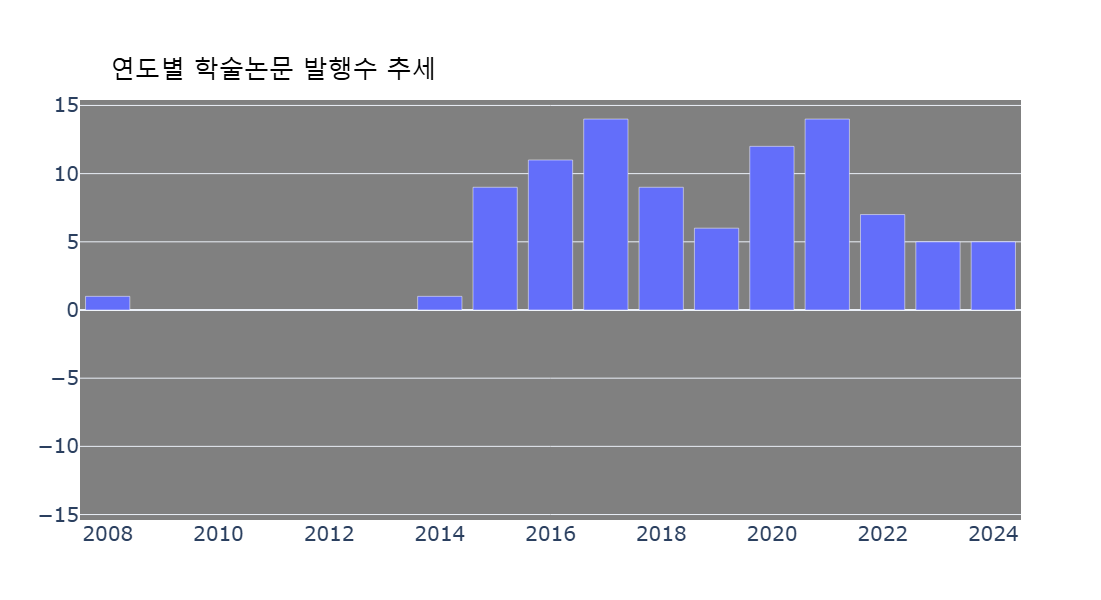

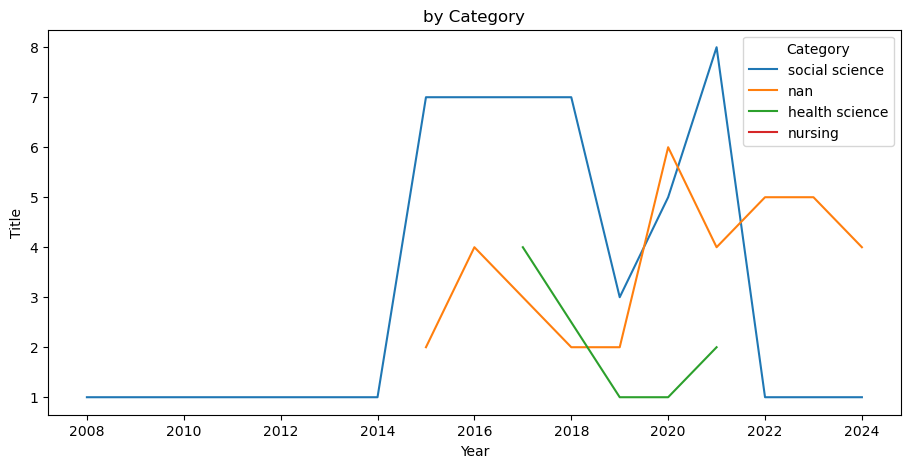

In [24]:
# 데이터 추세
## 연도별 학술논문 발행수 추세 
plot_bar(df.groupby('Year').count()[['Title']], title='연도별 학술논문 발행수 추세', save_local=False)
## 연도별 학술분야별 발행수 추세
df_plot = df.groupby(['Year', 'Category']).count()[['Title']].reset_index()
fig = plt.figure(figsize=(11, 5))
sns.lineplot(df_plot, x='Year', y='Title', hue='Category')
plt.title('by Category')
plt.show()

In [17]:
# 키워드 분포
word_freq, wordadj_freq, df_freq = preprocessing_wordfreq(df, colname_target=TARGET+'_Prep', colname_category=CATEGORY, 
                                                          ngram_range=NGRAM_RANGE,
                                                          tfidf_maxcol=TFIDF_MAXCOL, tfidf_dellowfreq=TFIDF_DELLOWFREQ,
                                                          keybert_topnkwd=KEYBERT_TOPNKWD,
                                                          sent2kwd_ray=RAY,
                                                          num_showkeyword=NUM_SHOWKEYWORD, 
                                                          save_local=SAVE_LOCAL, save_name=SAVE_NAME_PREP)

Preprocessing...: SoyNLP 2025-02-11 15:33:46.752743
training was done. used memory 1.414 Gby 1.413 Gb
all cohesion probabilities was computed. # words = 1941
all branching entropies was computed # words = 2441
all accessor variety was computed # words = 2441
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 1935
_noun_scores_ 0
after postprocessing 0
Preprocessing...: TF-IDF 2025-02-11 15:33:47.413817
Preprocessing...: KeyBERT 2025-02-11 15:33:47.642988
Saving...: 2025-02-11 15:35:19.170062
Sentence to Keywords...: 2025-02-11 15:35:19.195059


2025-02-11 15:35:23,997	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 
2025-02-11 15:35:33,811	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 
2025-02-11 15:35:46,280	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Results Concat!: 2025-02-11 15:35:53.365659


Token by SoyNLP  Token by TF-IDF  Token by KeyBERT  \
Length                0             4914              1856   

        Token(ADJ) by SoyNLP  Token(ADJ) by TF-IDF  Token(ADJ) by KeyBERT  
Length                     0                  2096                    807

word  score           word  score                word  score
0  NaN    NaN          abuse     22         elder abuse    100
1  NaN    NaN          elder     22  elder mistreatment     24
2  NaN    NaN    elder abuse     19       abuse neglect     24
3  NaN    NaN          older     14        older adults     18
4  NaN    NaN        neglect     14             nursing     11
5  NaN    NaN  abuse neglect     10               abuse     11
6  NaN    NaN         adults      9             elderly      9
7  NaN    NaN   mistreatment      9         older women      8
8  NaN    NaN   older adults      9             neglect      7
9  NaN    NaN          study      8            dementia      7

In [33]:
CATEGORY = 'Category'
word_freq_categ, wordadj_freq_categ, df_freq_categ = preprocessing_wordfreq(df, colname_target=TARGET+'_Prep', colname_category=CATEGORY, 
                                                          ngram_range=NGRAM_RANGE,
                                                          tfidf_maxcol=TFIDF_MAXCOL, tfidf_dellowfreq=TFIDF_DELLOWFREQ,
                                                          keybert_topnkwd=KEYBERT_TOPNKWD,
                                                          sent2kwd_ray=RAY,
                                                          num_showkeyword=NUM_SHOWKEYWORD, 
                                                          save_local=SAVE_LOCAL, save_name=SAVE_NAME_PREP)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

training was done. used memory 1.158 Gb1.158 Gb
all cohesion probabilities was computed. # words = 553
all branching entropies was computed # words = 897
all accessor variety was computed # words = 897
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 690
_noun_scores_ 0
after postprocessing 0


 25%|█████████████████████                                                               | 1/4 [00:16<00:49, 16.55s/it]

training was done. used memory 1.323 Gb 1.323 Gb
all cohesion probabilities was computed. # words = 2063
all branching entropies was computed # words = 2544
all accessor variety was computed # words = 2544
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 2133
_noun_scores_ 0
after postprocessing 0


 50%|██████████████████████████████████████████                                          | 2/4 [01:17<01:25, 42.65s/it]

training was done. used memory 1.501 Gb1.501 Gb
all cohesion probabilities was computed. # words = 88
all branching entropies was computed # words = 162
all accessor variety was computed # words = 162
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 87
_noun_scores_ 0
after postprocessing 0


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:22<00:25, 25.60s/it]

training was done. used memory 1.669 Gb 1.669 Gb
all cohesion probabilities was computed. # words = 2598
all branching entropies was computed # words = 3183
all accessor variety was computed # words = 3183
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 2554
_noun_scores_ 0
after postprocessing 0



00%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:44<00:00, 41.25s/it]

Saving...: 2025-02-07 22:59:31.990501
Sentence to Keywords...: 2025-02-07 22:59:32.037483


2025-02-07 22:59:36,328	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
2025-02-07 22:59:46,870	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
2025-02-07 23:00:02,067	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Results Concat!: 2025-02-07 23:00:07.976055


Token by SoyNLP  Token by TF-IDF  Token by KeyBERT  \
Length                0            13123               460   

        Token(ADJ) by SoyNLP  Token(ADJ) by TF-IDF  Token(ADJ) by KeyBERT  
Length                     0                  5724                      0

category word  score        category           word  score        category  \
0      NaN  NaN    NaN  health science        neglect      0  health science   
1      NaN  NaN    NaN  health science          abuse      0  health science   
2      NaN  NaN    NaN  health science           care      0  health science   
3      NaN  NaN    NaN  health science          elder      0  health science   
4      NaN  NaN    NaN  health science          older      0  health science   
5      NaN  NaN    NaN  health science          cases      0  health science   
6      NaN  NaN    NaN  health science  abuse neglect      0  health science   
7      NaN  NaN    NaN  health science      screening      0  health science   
8      NaN  NaN    NaN  health science          scale      0  health science   
9      NaN  NaN    NaN  health science           life      0  health science   

                              word  score  
0            screening elder abuse      0  
1         neglect patients treated      0  
2          screening elder neglect      0  
3           tools neglect patients      0  
4          screening tools neglect      0  
5                study elder abuse      0  
6         elder mistreatment study      0  
7           reportable elder abuse      0  
8  chinese communitydwelling older      0  
9            elder abuse including      0

In [24]:
word_freq[TOKENIZER][~word_freq[TOKENIZER]['word'].isin(SEARCH_KEYWORD)]

word  score
1       elder mistreatment     24
4                  nursing     11
6                  elderly      9
7              older women      8
9                 dementia      7
...                    ...    ...
1851          daily living      0
1852    punishment neglect      0
1853    followup questions      0
1854    diagnosis physical      0
1855  mistreatment methods      0

[1850 rows x 2 columns]

count   mean    std    min    25%    50%     75%     max
Length 538.0000 9.5743 2.9577 2.0000 8.0000 9.0000 11.0000 21.0000

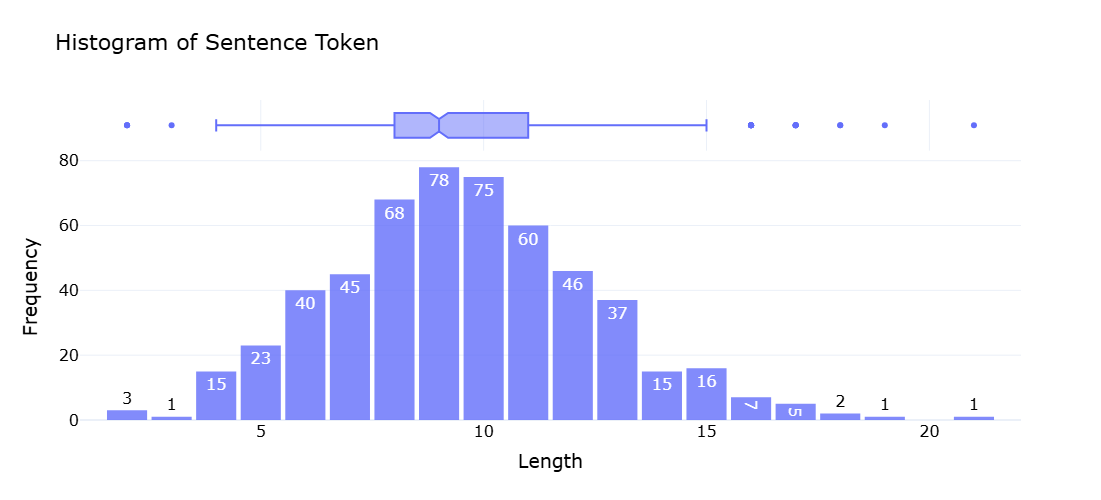

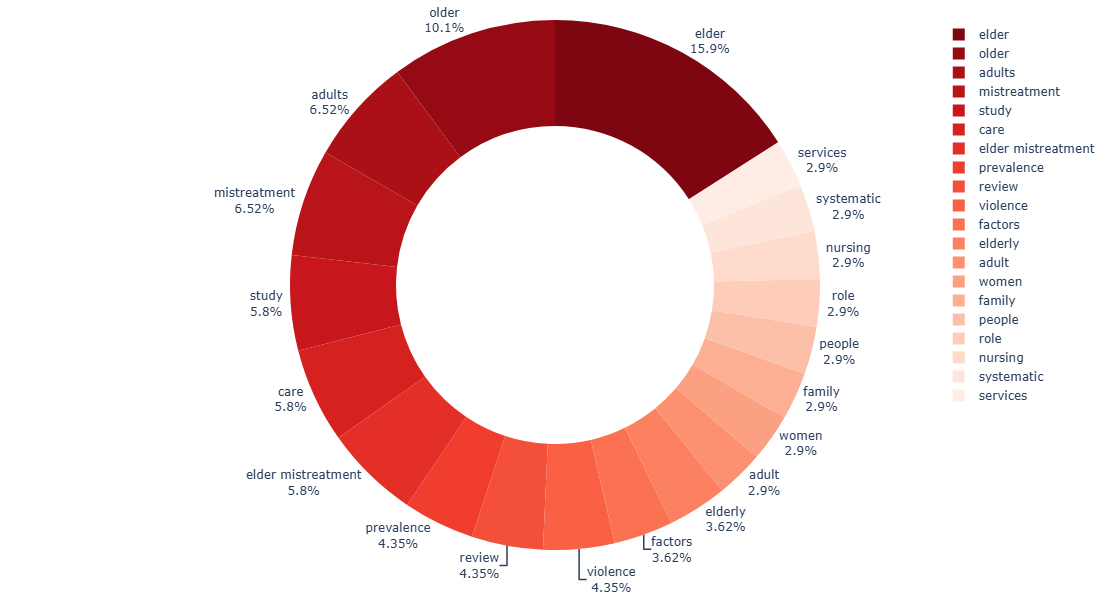

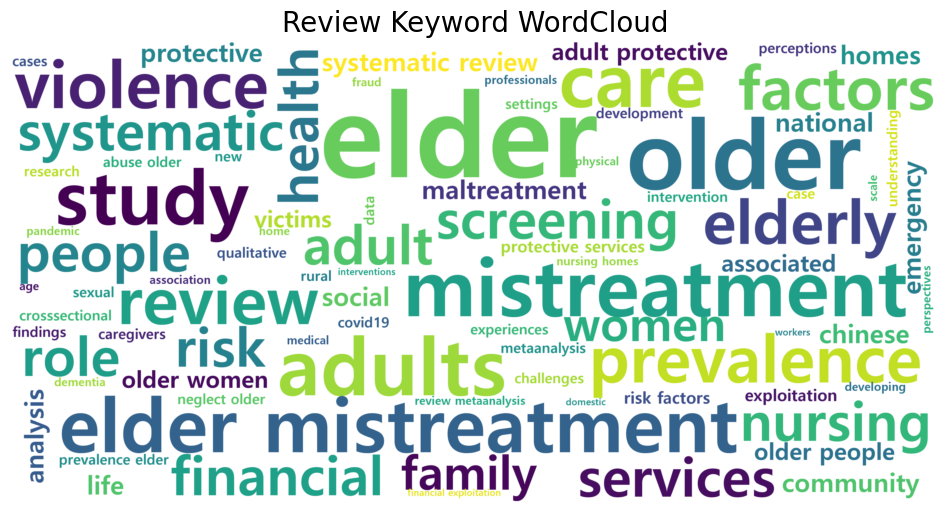

In [27]:
## 리뷰문장 토큰 길이 분포
TOKENIZER = 'TF-IDF'
plot_histogram_senttoken(df_freq['Token_'+TOKENIZER]) 
## 전체기간 주요키워드 분포
# plot_donut_wordfreq(word_freq[TOKENIZER], num_showkeyword=20)
# plot_wordcloud(word_freq[TOKENIZER], title='Review Keyword WordCloud', max_font_size=50, save_local=False)
plot_donut_wordfreq(word_freq[TOKENIZER][~word_freq[TOKENIZER]['word'].isin(SEARCH_KEYWORD)], num_showkeyword=20)
plot_wordcloud(word_freq[TOKENIZER][~word_freq[TOKENIZER]['word'].isin(SEARCH_KEYWORD)], title='Review Keyword WordCloud', max_font_size=50, save_local=False)
## 연도별(리뷰) 주요키워드 분포
# plot_treemap_wordfreq(word_freq_categ)
## 카테고리별 주요키워드 분포 -> 데이터가 적어서 학습조차 되지 않음

count   mean    std    min    25%    50%    75%    max
Length 538.0000 3.7900 1.4578 1.0000 3.0000 4.0000 5.0000 9.0000

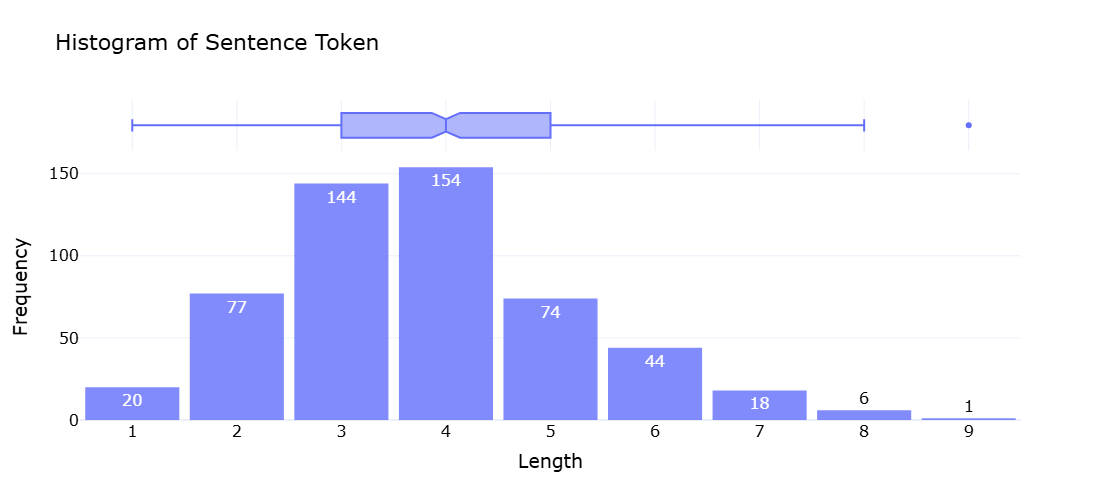

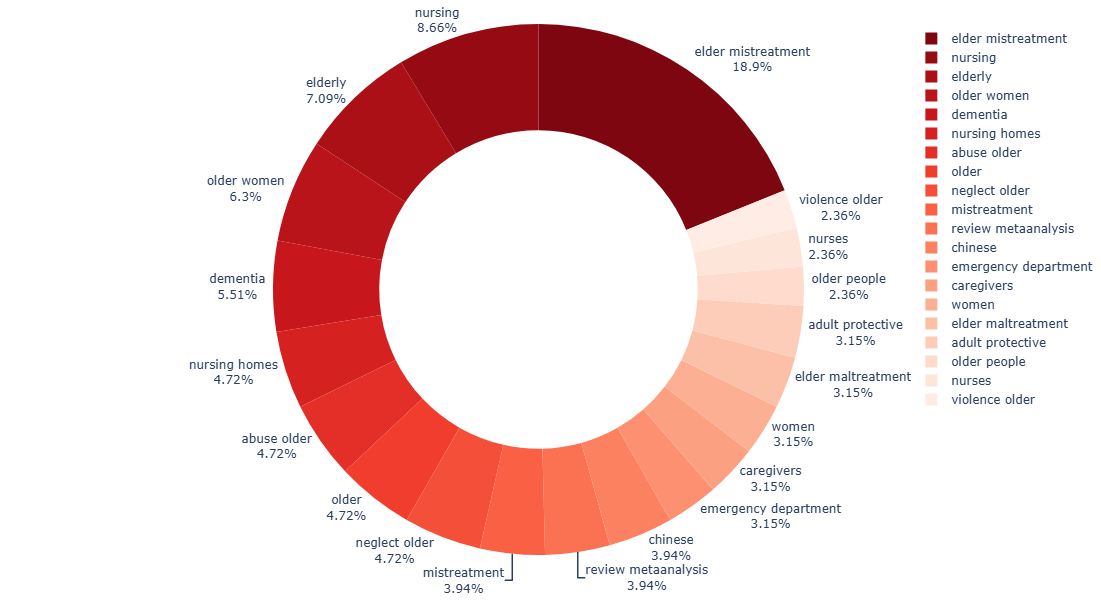

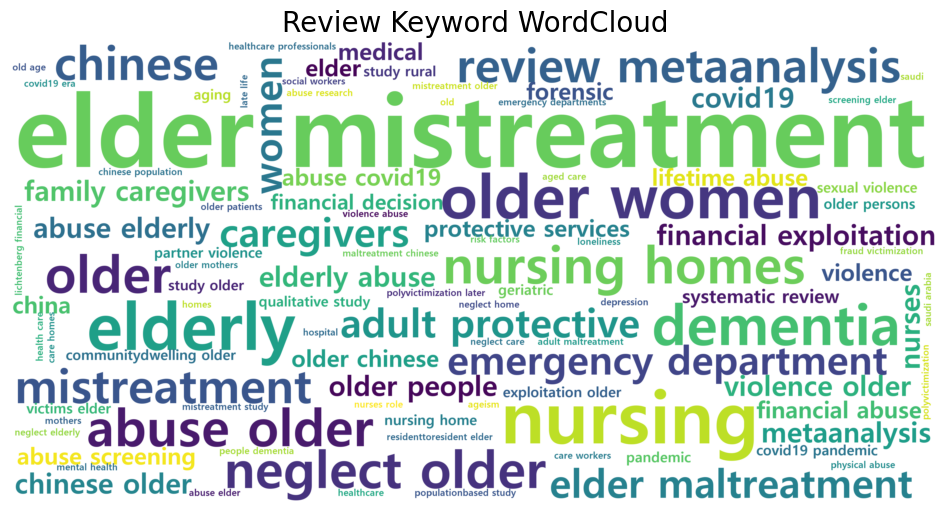

In [26]:
## 리뷰문장 토큰 길이 분포
plot_histogram_senttoken(df_freq['Token_'+TOKENIZER]) 
## 전체기간 주요키워드 분포
# plot_donut_wordfreq(word_freq[TOKENIZER], num_showkeyword=20)
# plot_wordcloud(word_freq[TOKENIZER], title='Review Keyword WordCloud', max_font_size=50, save_local=False)
plot_donut_wordfreq(word_freq[TOKENIZER][~word_freq[TOKENIZER]['word'].isin(SEARCH_KEYWORD)], num_showkeyword=20)
plot_wordcloud(word_freq[TOKENIZER][~word_freq[TOKENIZER]['word'].isin(SEARCH_KEYWORD)], title='Review Keyword WordCloud', max_font_size=50, save_local=False)
## 연도별(리뷰) 주요키워드 분포
# plot_treemap_wordfreq(word_freq_categ)
## 카테고리별 주요키워드 분포 -> 데이터가 적어서 학습조차 되지 않음

count   mean    std    min    25%    50%     75%     max
Length 538.0000 9.5743 2.9577 2.0000 8.0000 9.0000 11.0000 21.0000

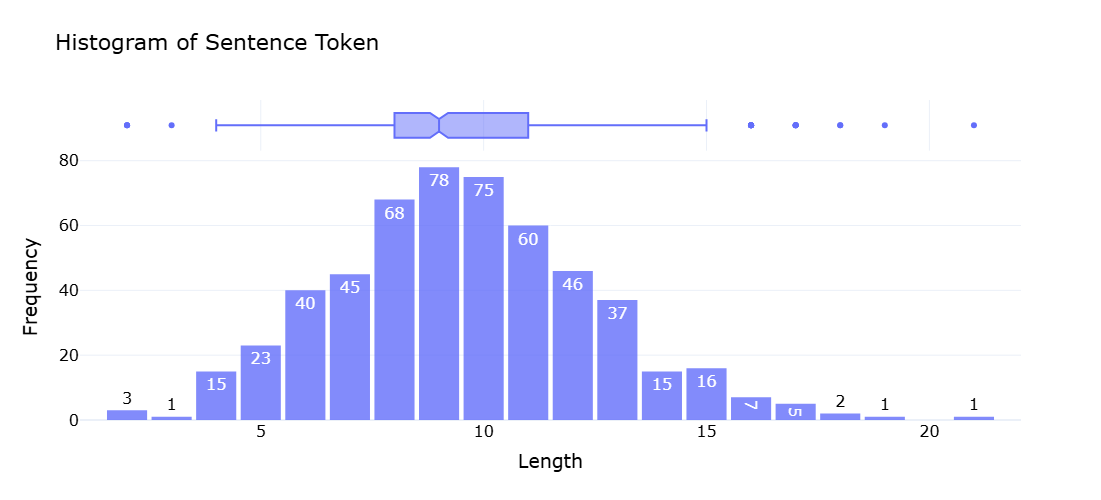

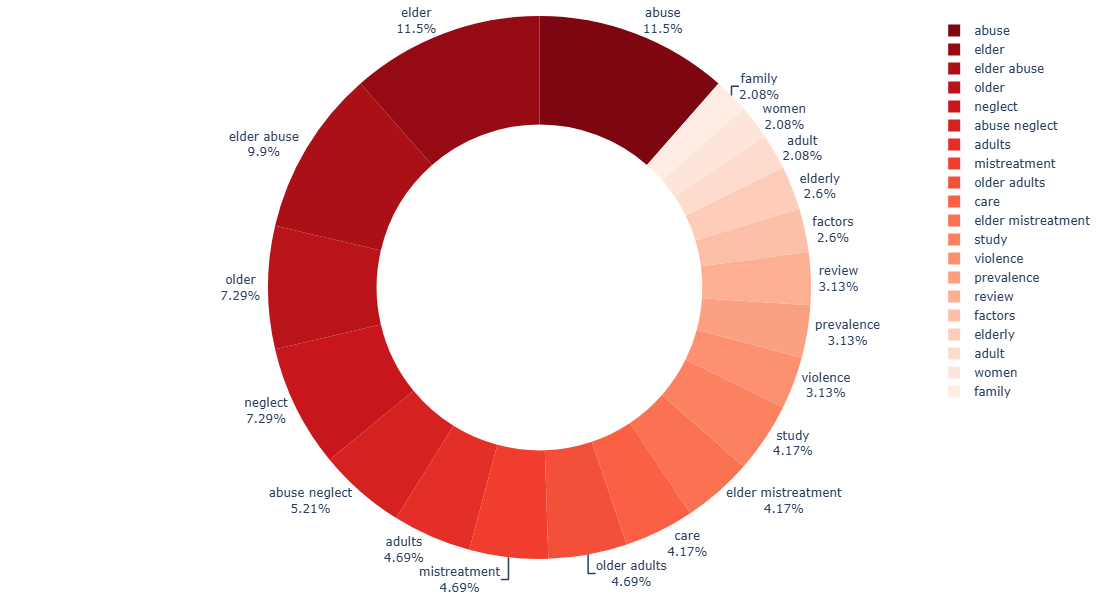

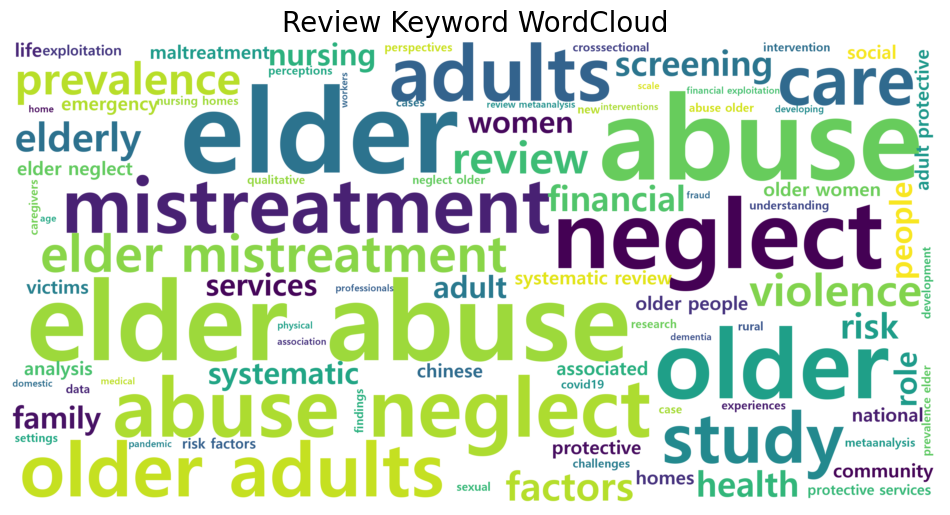

In [12]:
## 리뷰문장 토큰 길이 분포
plot_histogram_senttoken(df_freq['Token_'+TOKENIZER]) 
## 전체기간 주요키워드 분포
plot_donut_wordfreq(word_freq[TOKENIZER], num_showkeyword=20)
plot_wordcloud(word_freq[TOKENIZER], title='Review Keyword WordCloud', max_font_size=50, save_local=False)
## 연도별(리뷰) 주요키워드 분포
# plot_treemap_wordfreq(word_freq_categ)
## 카테고리별 주요키워드 분포 -> 데이터가 적어서 학습조차 되지 않음

2025-02-07 23:20:27,964	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Optimal Topic Number:  3


[Kss]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


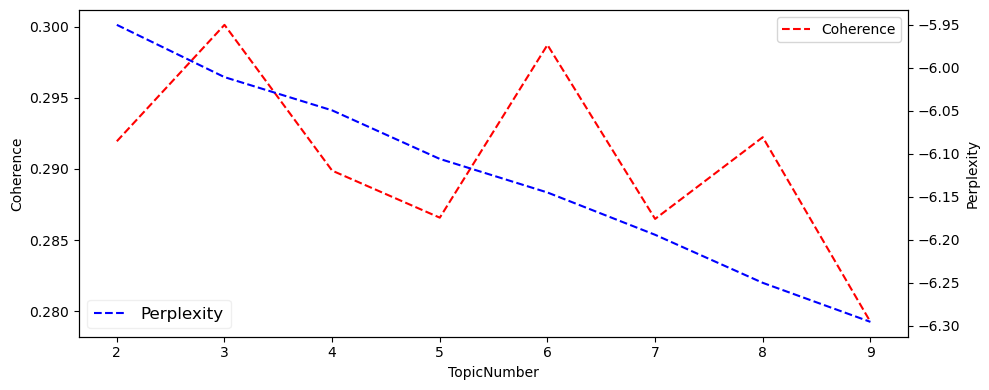

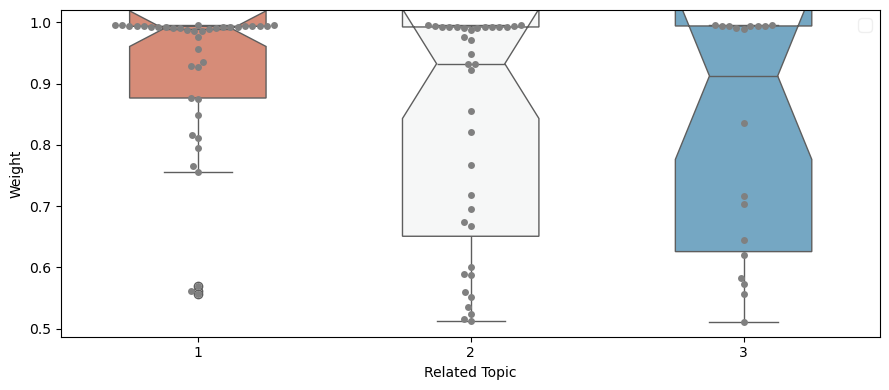

Related Keywords  \
Topic 1  'abuse(20.1%)', 'en(16.6%)', 'elder(15.9%)', 'care(10.2%)', 'ed(8.5%)', 'ci(7.4%)', 'em(7.4%)', ...   
Topic 2  'en(16.6%)', 'em(13.4%)', 'abuse(12.6%)', 'care(12.3%)', 'elder(9.9%)', 'ci(8.7%)', 'neglect(8.7...   
Topic 3  'em(18.1%)', 'en(15.5%)', 'neglect(11.9%)', 'care(10.2%)', 'elder(9.7%)', 'abuse(8.8%)', 'ed(7.5...   

         Number of Sentences  Percentage  Average Probability  
Topic 1                   40      0.4255               0.9194  
Topic 2                   36      0.3830               0.8266  
Topic 3                   18      0.1915               0.8158

Topic Number  Weight  \
8       Topic 1  0.9956   
40      Topic 1  0.9956   
1       Topic 1  0.9955   
41      Topic 1  0.9952   
76      Topic 1  0.9950   
16      Topic 2  0.9957   
47      Topic 2  0.9953   
93      Topic 2  0.9944   
50      Topic 2  0.9943   
43      Topic 2  0.9930   
68      Topic 3  0.9961   
84      Topic 3  0.9951   
59      Topic 3  0.9946   
89      Topic 3  0.9943   
45      Topic 3  0.9943   

                                                                                    Title+Abstract_Prep  
8   study factors affecting elder abuse actions healthcare facilities aged purpose study figure majo...  
40  carer coping resident agitation predictors quality life care home residents living dementia mana...  
1   legalpolicy improvementmeasures prevention elder abuse korea quality life elderly people social ...  
41  contrasting vantage points caregivers residents perception elder abuse neglect longterm care  el...  
76  prevalence selfreported elder abuse older women community settings systematic review metaanalysi...  
16  ethical challenges nursing homesstaffs opinions experiences systematic ethics meetings participa...  
47  abuse older adults moving old age homes pokhara lekhnath metropolitan city nepal crosssectional ...  
93  staff burnout neglect elderly residential care patients increasing concern patient neglect nursi...  
50  findings mixedmethods pragmatic cluster trial evaluating impact ethics education interventions r...  
43  communication neglect caregiver anger hostility perceptions older care receivers cognitive statu...  
68  prevalence risk factors elder maltreatment chinese americans ethnic groups suffered elder maltre...  
84  detecting risk neglect nshap round 3 new followup questions activities daily living measures eld...  
59  prevalence correlates elder neglect communitydwelling chinese population new evidence clhls stud...  
89  lack association elder mistreatment mortality prior research limited inconsistent degree elder m...  
45  exploring elder neglect new theoretical perspectives diagnostic challenges neglect older adults ...

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

training was done. used memory 2.001 Gb 2.001 Gb
all cohesion probabilities was computed. # words = 2345
all branching entropies was computed # words = 2801
all accessor variety was computed # words = 2801
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 2328
_noun_scores_ 0
after postprocessing 0


 33%|████████████████████████████                                                        | 1/3 [01:18<02:37, 78.64s/it]

training was done. used memory 2.175 Gb 2.175 Gb
all cohesion probabilities was computed. # words = 2053
all branching entropies was computed # words = 2541
all accessor variety was computed # words = 2541
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 2025
_noun_scores_ 0
after postprocessing 0


 67%|████████████████████████████████████████████████████████                            | 2/3 [02:22<01:09, 70.00s/it]

training was done. used memory 2.359 Gb 2.359 Gb
all cohesion probabilities was computed. # words = 1059
all branching entropies was computed # words = 1481
all accessor variety was computed # words = 1481
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 1289
_noun_scores_ 0
after postprocessing 0



00%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:01<00:00, 60.48s/it]

Saving...: 2025-02-07 23:24:17.393787
Sentence to Keywords...: 2025-02-07 23:24:17.469800


2025-02-07 23:24:21,461	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
2025-02-07 23:24:31,105	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
2025-02-07 23:24:44,769	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Results Concat!: 2025-02-07 23:24:49.901648


Token by SoyNLP  Token by TF-IDF  Token by KeyBERT  \
Length                0            15000               460   

        Token(ADJ) by SoyNLP  Token(ADJ) by TF-IDF  Token(ADJ) by KeyBERT  
Length                     0                  5666                      0

category word  score category           word  score category  \
0      NaN  NaN    NaN        1          abuse      4        1   
1      NaN  NaN    NaN        1          elder      3        1   
2      NaN  NaN    NaN        1    elder abuse      2        1   
3      NaN  NaN    NaN        1        neglect      1        1   
4      NaN  NaN    NaN        1           care      1        1   
5      NaN  NaN    NaN        1        elderly      1        1   
6      NaN  NaN    NaN        1          older      1        1   
7      NaN  NaN    NaN        1  abuse neglect      1        1   
8      NaN  NaN    NaN        1          study      1        1   
9      NaN  NaN    NaN        1     facilities      0        1   

                        word  score  
0      elder abuse screening      1  
1         elder abuse global      1  
2          elder abuse study      1  
3          study elder abuse      1  
4          elder abuse cases      1  
5  study australian coroners      0  
6          elder abuse ideas      0  
7     model attributes abuse      0  
8     abuse study australian      0  
9      abuse ideas generated      0

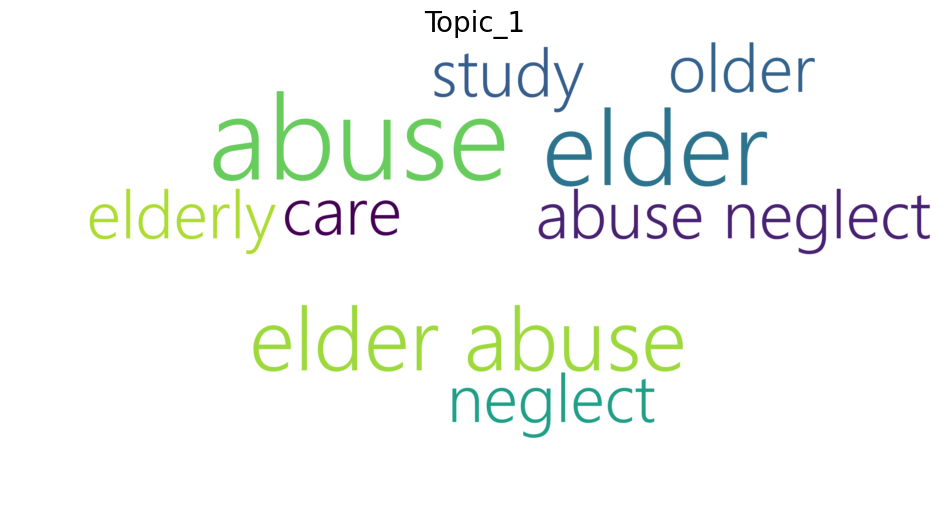

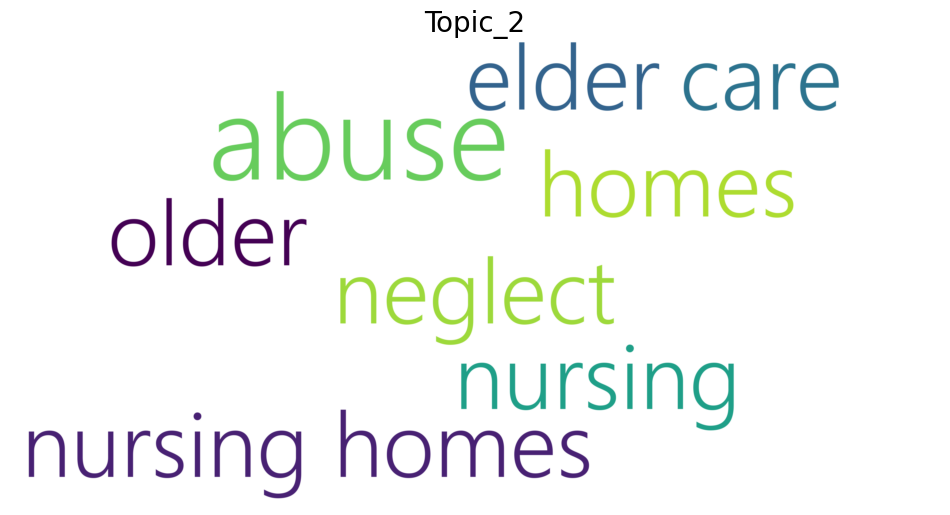

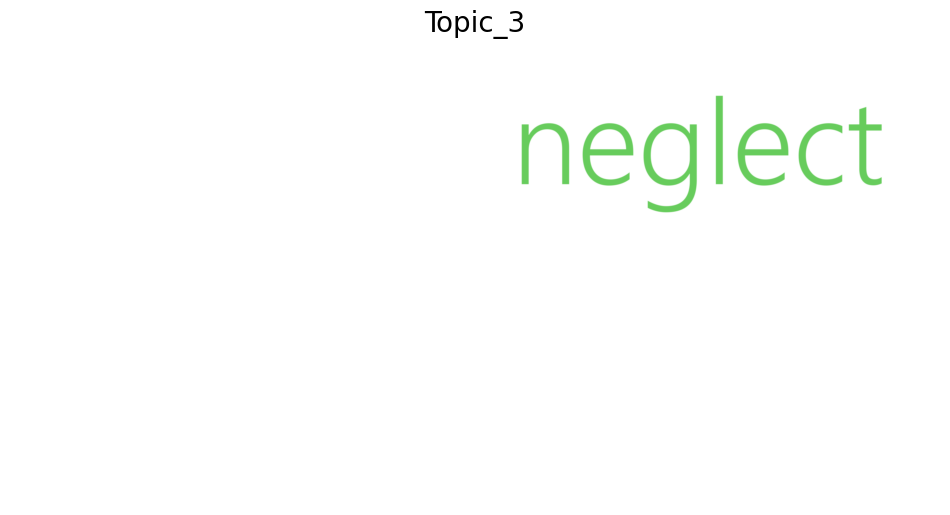

In [56]:
# 주요 연구토픽 트랜드
# LDA
topic_kw_LDA, topic_doc_LDA, \
doc_topic_LDA, model_LDA = modeling_LDA(df_freq['Token_'+TOKENIZER], df_freq[TARGET+'_Prep'],
                                        num_topics=NUM_TOPICS, num_topicwords=NUM_TOPICWORDS, num_topicsamples=NUM_TOPICSAMPLES,
                                        save_local=SAVE_LOCAL, save_name=SAVE_NAME_LDA)
display(topic_kw_LDA, topic_doc_LDA)

## 토픽별 워드클라우드
word_freq_topic, wordadj_freq_topic, df_freq_topic = preprocessing_wordfreq(doc_topic_LDA, colname_target=TARGET+'_Prep', colname_category='Related Topic', 
                                                          ngram_range=NGRAM_RANGE,
                                                          tfidf_maxcol=TFIDF_MAXCOL, tfidf_dellowfreq=TFIDF_DELLOWFREQ,
                                                          keybert_topnkwd=KEYBERT_TOPNKWD,
                                                          sent2kwd_ray=RAY,
                                                          num_showkeyword=NUM_SHOWKEYWORD, 
                                                          save_local=SAVE_LOCAL, save_name=SAVE_NAME_PREP)
for group in word_freq_topic[TOKENIZER]['category'].unique():
    df_sub = word_freq_topic[TOKENIZER][word_freq_topic[TOKENIZER]['category'] == group]
    plot_wordcloud(df_sub, title='Topic_'+str(group), max_font_size=50, save_local=False)

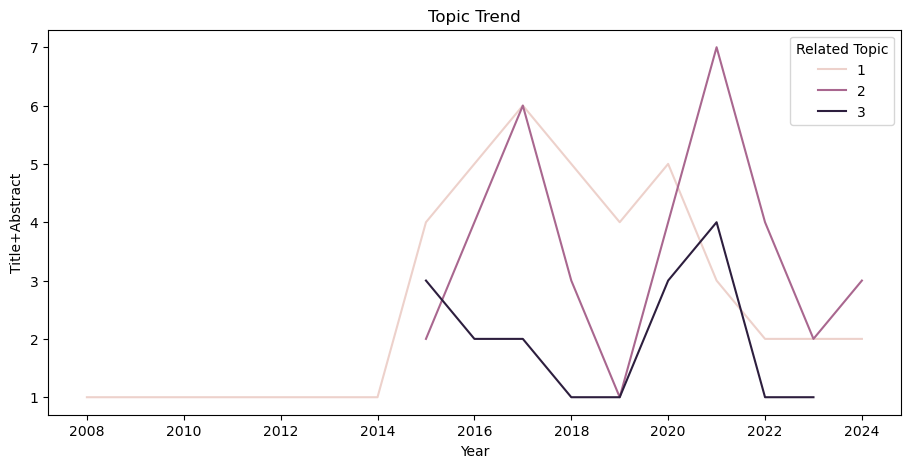

In [57]:
# 데이터결합
df_total = pd.concat([df, doc_topic_LDA.iloc[:,1:]], axis=1)
## 연도별 Hot & Cold 토픽수 변화
df_plot = df_total.groupby(['Year', 'Related Topic'])['Title+Abstract'].count().reset_index()
fig = plt.figure(figsize=(11, 5))
sns.lineplot(df_plot, x='Year', y='Title+Abstract', hue='Related Topic')
plt.title('Topic Trend')
plt.show()

## 연도별 Hot & Cold 토픽확률분포 시각화
# df_plot = df_total.groupby(['Year', 'Related Topic'])['Weight'].mean().reset_index()
# fig = plt.figure(figsize=(11, 5))
# sns.lineplot(df_plot, x='Year', y='Weight', hue='Related Topic')
# plt.title('Topic Trend')
# plt.show()


In [ ]:
## 토픽과 학술분야의 상관관계 시각화 -> 데이터 부족으로 상관관계 연산 불가

In [ ]:
# df_freqadj[df_freqadj['word(TF-IDF)'].str.contains('neglect')].to_csv('neglect_nextword.csv')